## Adaptation of Univariate Plots

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

fuel_econ = pd.read_csv('data/fuel_econ.csv')
fuel_econ.head()


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### Adapted Bar Charts
Histograms and bar charts were introduced in the previous lesson as depicting the distribution of numeric and categorical variables, respectively, with the height (or length) of bars indicating the number of data points that fell within each bar's range of values. These plots can be adapted for use as bivariate plots by, instead of indicating count by height, indicating a mean or other statistic on a second variable.

Plot a numerical variable against a categorical variable by adapting a bar chart so that its bar heights indicate the means of a numerical variable.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


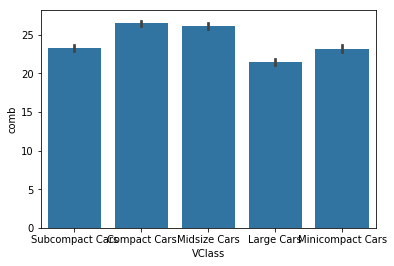

In [4]:
base_color = sb.color_palette()[0]
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

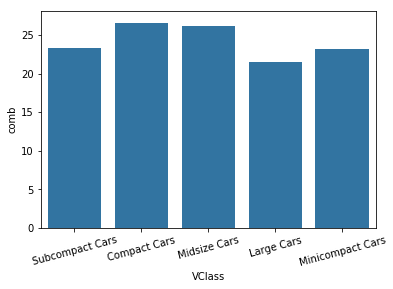

In [8]:
base_color = sb.color_palette()[0]
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color, errwidth = 0)
plt.xticks(rotation = 15)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

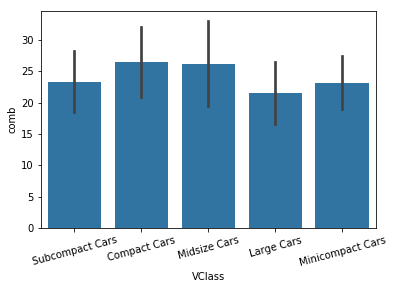

In [11]:
base_color = sb.color_palette()[0]
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color, ci = 'sd')
plt.xticks(rotation = 15)

As an alternative, the ```pointplot``` function can be used to plot the averages rather than bars. This can be useful if having bars in reference to a 0 baseline aren't important or would be confusing.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

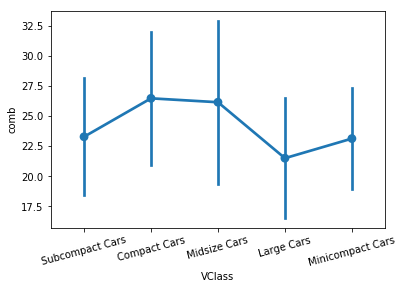

In [10]:
sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', ci = 'sd')
plt.xticks(rotation = 15)

By default, pointplotwill connect values by a line. This is fine if the categorical variable is ordinal in nature, but it can be a good idea to remove the line via ```linestyles = ""``` for nominal data.

Text(0,0.5,'Avg. combined fuel eff (mpg)')

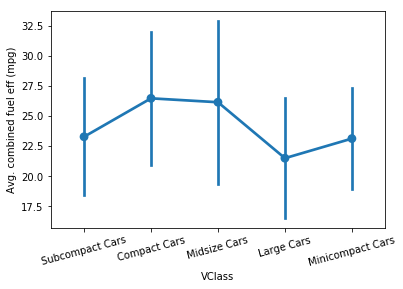

In [12]:
sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', ci = 'sd')
plt.xticks(rotation = 15)
plt.ylabel('Avg. combined fuel eff (mpg)')

The above plots can be useful alternatives to the box plot and violin plot if the data is not conducive to either of those plot types. For example, if the numeric variable is binary in nature, taking values only of 0 or 1, then a box plot or violin plot will not be informative, leaving the adapted bar chart as the best choice for displaying the data.

NameError: name 'df' is not defined

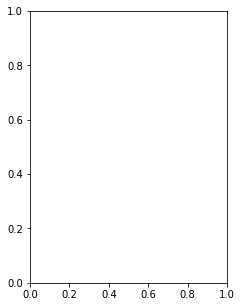

In [15]:
plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
sb.violinplot(data = df, x = 'condition', y = 'binary_out', inner = None,
              color = base_color)
plt.xticks(rotation = 10) # include label rotation due to small subplot size

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data = df, x = 'condition', y = 'binary_out', color = base_color)
plt.xticks(rotation = 10)

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data = df, x = 'condition', y = 'binary_out', color = base_color)
plt.xticks(rotation = 10)

![](images/adaptative_plot_violin_bar.png)


### Adaptative histograms

Matplotlib's hist function can also be adapted so that bar heights indicate value other than a count of points through the use of the "weights" parameter. By default, each data point is given a weight of 1, so that the sum of point weights in each bin is equal to the number of points. If we change the weights to be a representative function of each point's value on a second variable, then the sum will end up representing something other than a count.

In [17]:
bin_edges = np.arange(0, df['num_var'].max()+1/3, 1/3)

# count number of points in each bin
bin_idxs = pd.cut(df['num_var'], bin_edges, right = False, include_lowest = True,
                  labels = False).astype(int)
pts_per_bin = df.groupby(bin_idxs).size()

num_var_wts = df['binary_out'] / pts_per_bin[bin_idxs].values

# plot the data using the calculated weights
plt.hist(data = df, x = 'num_var', bins = bin_edges, weights = num_var_wts)
plt.xlabel('num_var')
plt.ylabel('mean(binary_out)')

NameError: name 'df' is not defined

To get the mean of the y-variable ("binary_out") in each bin, the weight of each point should be equal to the y-variable value, divided by the number of points in its x-bin (num_var_wts). As part of this computation, we make use of pandas' cut function in order to associate each data point to a particular bin (bin_idxs). The labels = False parameter means that each point's bin membership is associated by a numeric index, rather than a string. We use these numeric indices into the pts_per_bin, with the .values at the end necessary in order for the Series' indices to not be confused between the indices of df['binary_out'].

![](images/binary_output.png)

This plot shows that the average outcome of the y-variable "binary_out" generally increases across values of the x-variable "num_var".